In [7]:
%matplotlib inline

In [2]:
import json
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

# Stanford dogs (extras)

In [10]:
data_dir = Path("../../data/")
stanford_extras_path = data_dir / "stanford_dogs/stanford_extra_keypoints.json"
image_path = data_dir / "stanford_dogs/images"

In [13]:

stanford_extras = json.loads(stanford_extras_path.read_text())
stanford_extras[0]

{'img_path': 'n02085782-Japanese_spaniel/n02085782_2886.jpg',
 'img_width': 350,
 'img_height': 272,
 'img_bbox': [205, 20, 116, 201],
 'is_multiple_dogs': False,
 'joints': [[108.66666666666667, 252.0, 1],
  [147.66666666666666, 229.0, 1],
  [163.5, 208.5, 1],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [54.0, 244.0, 1],
  [77.33333333333333, 225.33333333333334, 1],
  [79.0, 196.5, 1],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [150.66666666666666, 86.66666666666667, 1],
  [88.66666666666667, 73.0, 1],
  [116.0, 106.33333333333333, 1],
  [109.0, 123.33333333333333, 1],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0]],
 'seg': 'Yi71c01S74jHNU75gHMX75eHM[74cHM\\76`HL4HQ7k0lHXOT7R1O2N010O010jLiNROW1m0lNROT1m0oNPOQ1P1QOoNn0R1ROnNn0oMkNQ2:Nl0oMlNQ2:0j0nMnNP291j0mMoNR280j0kMPOLEg1c0`0i0lMCb1Db0i0jMGa1Ae0h0iMI`1_Og0j0fMK`1\\Oj0i0eMN^1ZOl0i0dM1]1WOm0k0cM2]1TOP1j0bM4\\1ROR1k0`M<W1iNX1l0`M=:ZN4=Q2T3aMXLO8>=Q2k3oMULQ2k3oMTLQ2m3mMULS2j3mMWLS2i3kMY

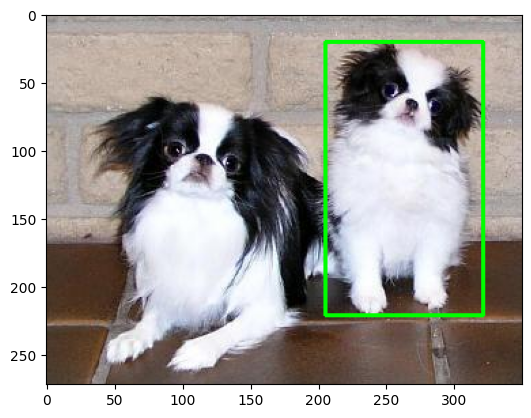

In [18]:
def show_stanford_bbox(image_path, bbox, axis=None): 
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    x0, y0, width, height = bbox
    image = cv2.rectangle(image, (x0, y0), (x0 + width, y0 + height), (0, 255, 0), 2)
    if axis is not None:
        axis.imshow(image)
    else:
        plt.imshow(image)
        plt.show()

show_stanford_bbox(image_path/stanford_extras[0]['img_path'], stanford_extras[0]['img_bbox'])

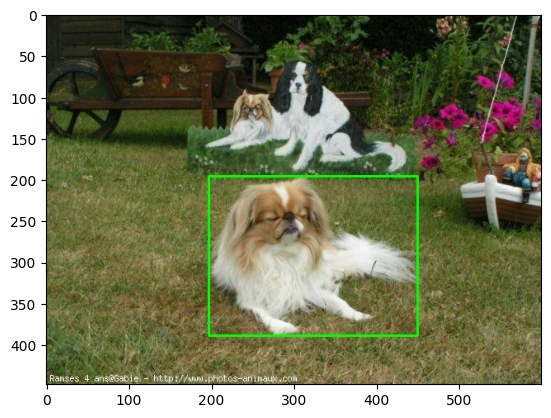

In [19]:
show_stanford_bbox(image_path/stanford_extras[1]['img_path'], stanford_extras[1]['img_bbox'])

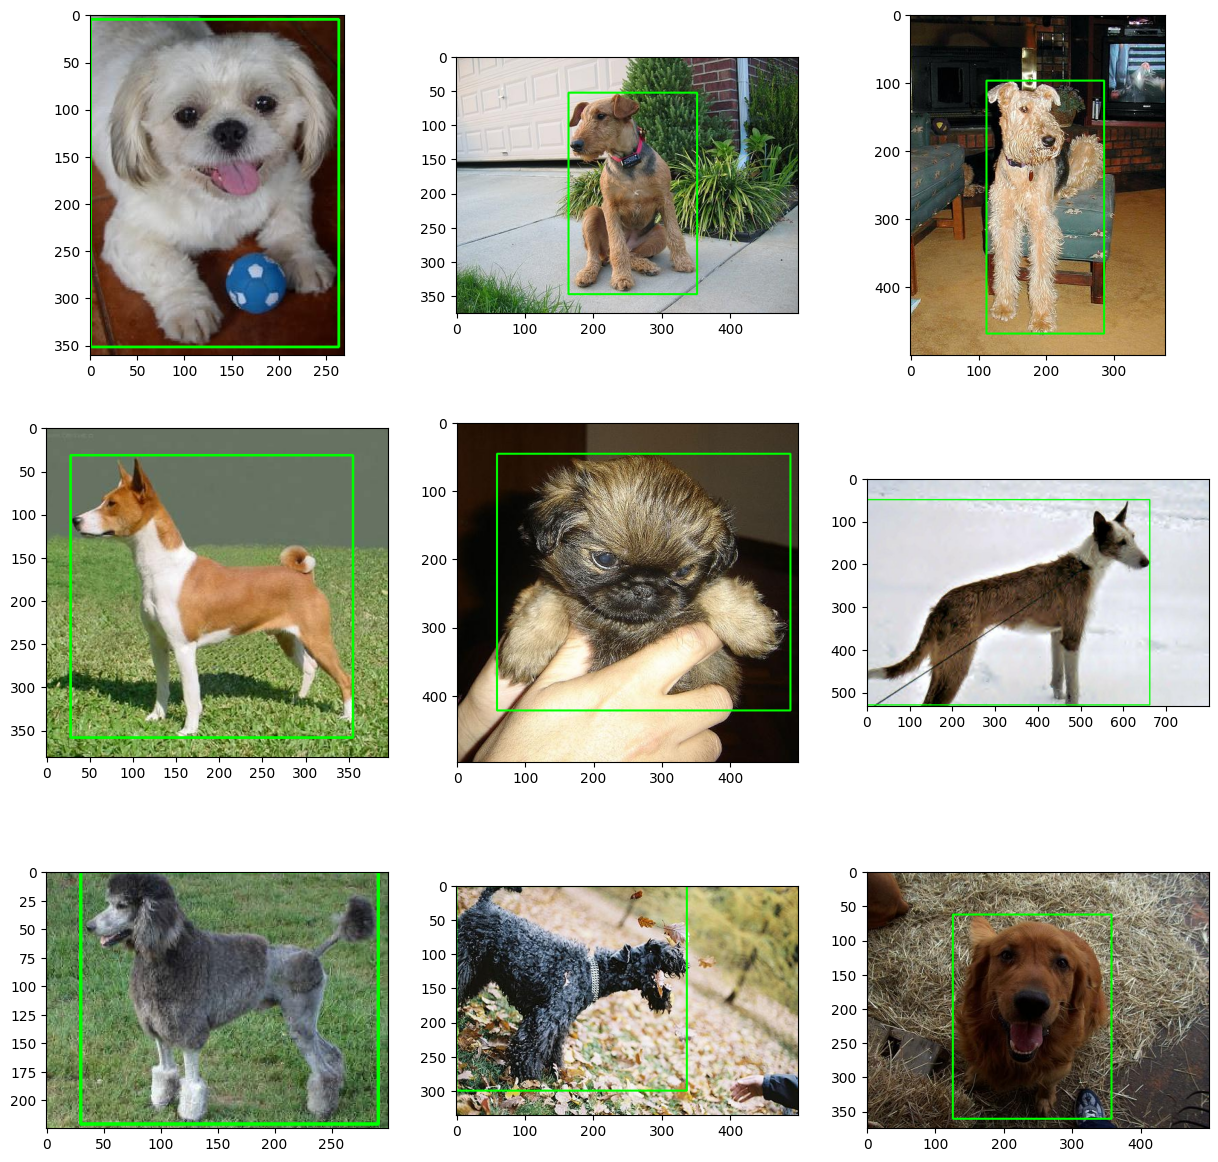

In [22]:
# Sample some random ones and put it on a grid
import random

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for ax in axs.flatten():
    sample = random.choice(stanford_extras)
    show_stanford_bbox(image_path/sample['img_path'], sample['img_bbox'], axis=ax)
plt.show()

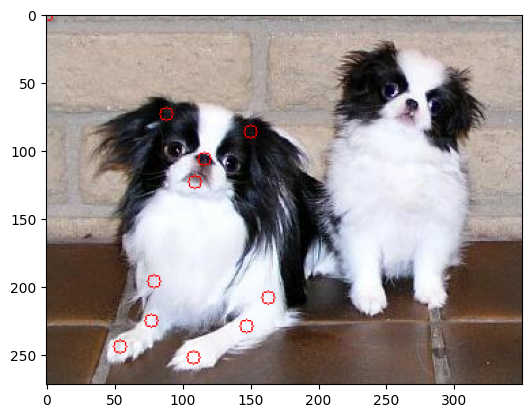

In [30]:
def show_stanford_joints(image, joints, axis=None): 
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for (x, y, v) in joints:
        if v >= 0:
            image = cv2.circle(image, (int(x), int(y)), 5, (255, 0, 0))
    if axis is not None:
        axis.imshow(image)
    else:
        plt.imshow(image)
        plt.show()

show_stanford_joints(image_path/stanford_extras[0]['img_path'], stanford_extras[0]['joints'])

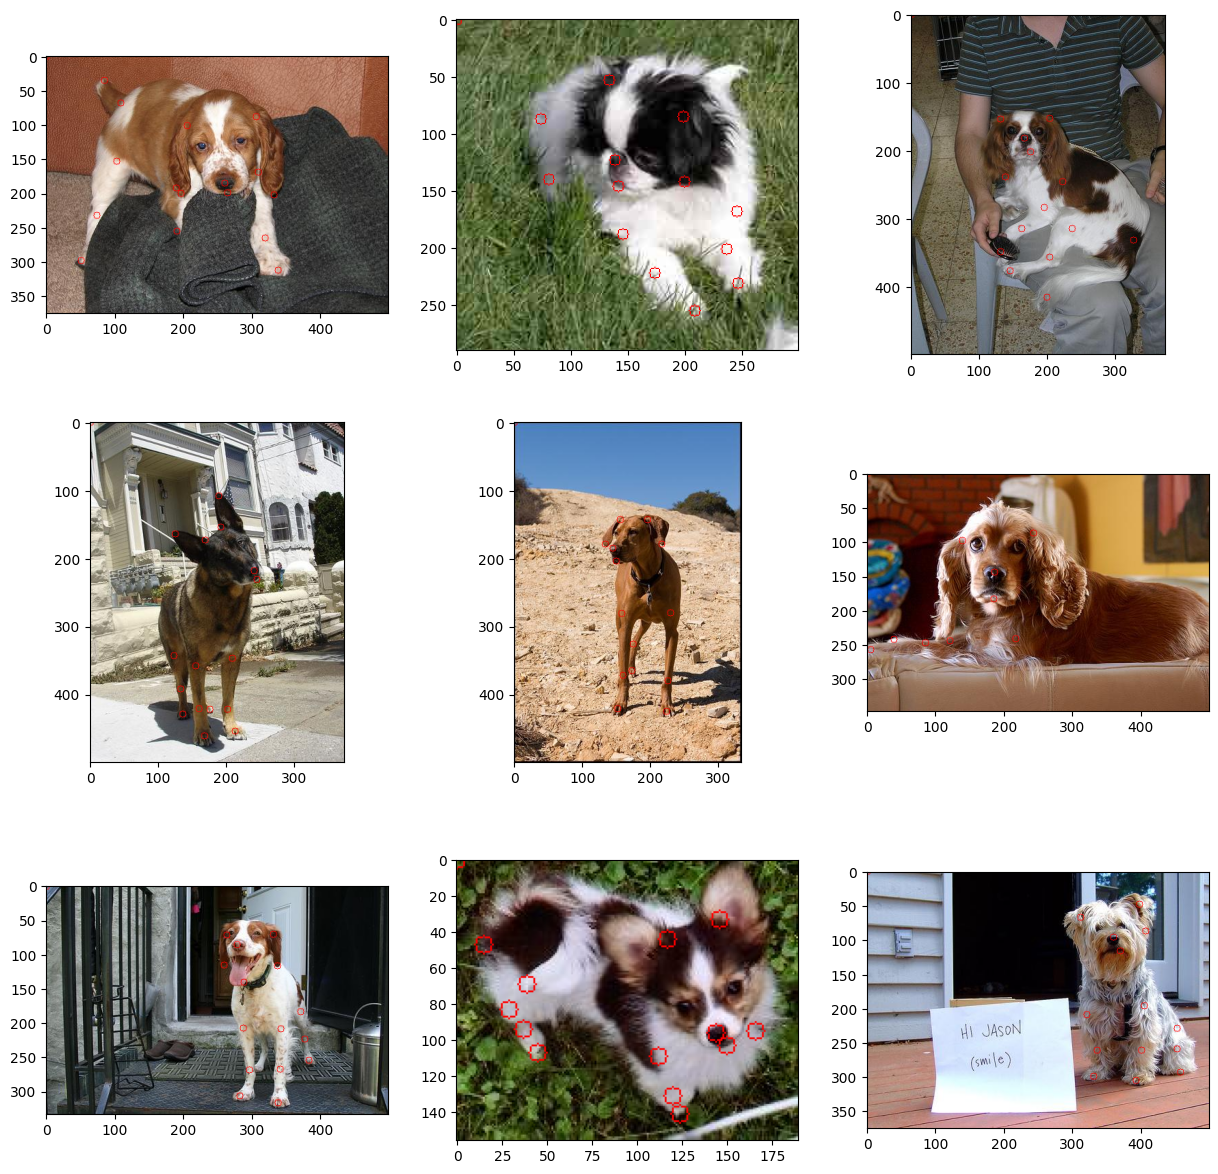

In [31]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for ax in axs.flatten():
    sample = random.choice(stanford_extras)
    show_stanford_joints(image_path/sample['img_path'], sample['joints'], axis=ax)
plt.show()

# COCO